In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_folder = "Final work/Validation against clinically approved drugs"
targets = [
    "3eoa",
    "1bey",
    "1ce1",
    "1n8z",
    "1l7i",
    "6vi2_BA"
]

for target in targets:
    for folder in ["correlations-DF", "pictures_and_pdb_files"]:
        os.makedirs(f"{base_folder}/{target}/{target}_{folder}", exist_ok=True)

    subfolders = ["all_amino_acids", "chains", "amino_acid_type(wt_aa)", "amino_acid_type(mut_aa)"]
    for subfolder in subfolders:
        os.makedirs(f"{base_folder}/{target}/{target}_correlations-DF/{subfolder}", exist_ok=True)

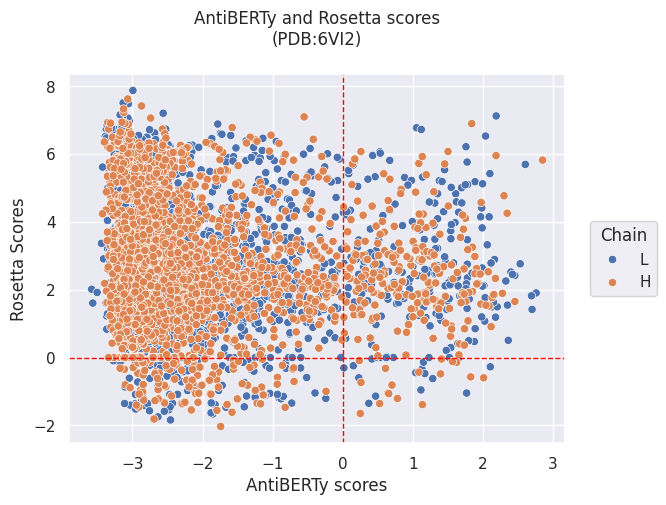

In [3]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_pictures_and_pdb_files"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_pictures_and_pdb_files"
output_folder_1ce1 = "Final work/Validation against clinically approved drugs/1ce1/1ce1_pictures_and_pdb_files"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_pictures_and_pdb_files"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_pictures_and_pdb_files"
output_folder_6vi2_BA = "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_pictures_and_pdb_files"

def distribution_scatterplot(df, hue_col, title, save_path):
    plt.clf()
    pearson_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    spearman_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method = "spearman")
    variance = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    sns.set_theme()
    sns.scatterplot(data = df, x = "AntiBERTy normalised", y = "Rosetta normalised", hue = hue_col)
    plt.axvline(x=0, color = "red", linestyle = "--", linewidth = 1)
    plt.axhline(y=0, color = "red", linestyle = "--", linewidth = 1)
    plt.xlabel("AntiBERTy scores")
    plt.ylabel("Rosetta Scores")
    plt.legend(bbox_to_anchor=(1.2, 0.5), loc = "right", title = "Chain")
    plt.title(f"{title}\n")
    plt.savefig(f"{save_path}", bbox_inches="tight")


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
distribution_scatterplot(a3eoa_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(Efalizumab - PDB:3EOA)", f"{output_folder_3eoa}/Score_distribution_scatterplot.png")

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
distribution_scatterplot(a1bey_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1BEY)", f"{output_folder_1bey}/Score_distribution_scatterplot.png")

a1ce1_file = pd.read_csv("Clean files/1ce1_HL.csv")
distribution_scatterplot(a1ce1_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1CE1)", f"{output_folder_1ce1}/Score_distribution_scatterplot.png")

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
distribution_scatterplot(a1n8z_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(Trastuzumab - PDB:1N8Z)", f"{output_folder_1n8z}/Score_distribution_scatterplot.png")

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
distribution_scatterplot(a1l7i_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1L7I)", f"{output_folder_1l7i}/Score_distribution_scatterplot.png")

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
distribution_scatterplot(a6vi2_BA_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:6VI2)", f"{output_folder_6vi2_BA}/Score_distribution_scatterplot.png")

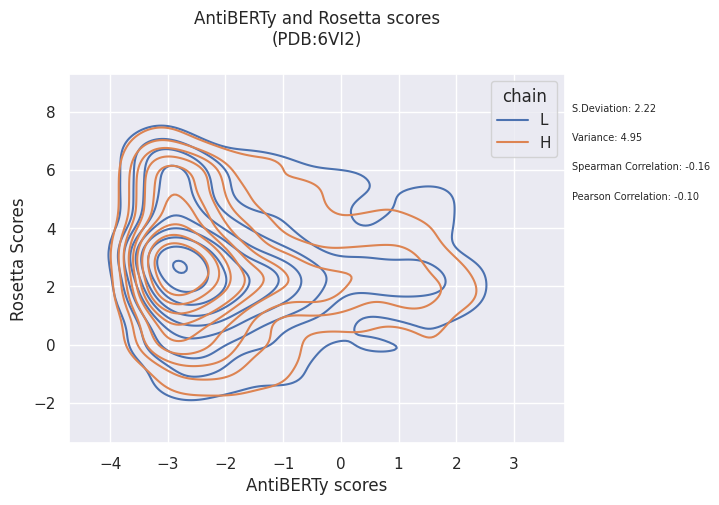

In [4]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_pictures_and_pdb_files"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_pictures_and_pdb_files"
output_folder_1ce1 = "Final work/Validation against clinically approved drugs/1ce1/1ce1_pictures_and_pdb_files"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_pictures_and_pdb_files"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_pictures_and_pdb_files"
output_folder_6vi2_BA = "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_pictures_and_pdb_files"

def distribution_scatterplot(df, hue_col, title, save_path):
    plt.clf()
    pearson_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    spearman_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method = "spearman")
    variance = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    sns.set_theme()
    sns.kdeplot(data = df, x = "AntiBERTy normalised", y = "Rosetta normalised", hue = hue_col)
    plt.xlabel("AntiBERTy scores")
    plt.ylabel("Rosetta Scores")
    plt.title(f"{title}\n")
    plt.text(4,5, f"Pearson Correlation: {pearson_correlation:.2f}", fontsize=7)  # .2f - 2 decimal places displayed
    plt.text(4,6, f"Spearman Correlation: {spearman_correlation:.2f}", fontsize=7)
    plt.text(4,7, f"Variance: {variance:.2f}", fontsize=7)
    plt.text(4,8, f"S.Deviation: {std_dev:.2f}", fontsize=7)
    plt.savefig(f"{save_path}", bbox_inches="tight")


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
distribution_scatterplot(a3eoa_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(Efalizumab - PDB:3EOA)", f"{output_folder_3eoa}/Score_distribution_kde-plot.png")

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
distribution_scatterplot(a1bey_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1BEY)", f"{output_folder_1bey}/Score_distribution_kde-plot.png")

a1ce1_file = pd.read_csv("Clean files/1ce1_HL.csv")
distribution_scatterplot(a1ce1_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1CE1)", f"{output_folder_1ce1}/Score_distribution_kde-plot.png")

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
distribution_scatterplot(a1n8z_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(Trastuzumab - PDB:1N8Z)", f"{output_folder_1n8z}/Score_distribution_kde-plot.png")

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
distribution_scatterplot(a1l7i_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1L7I)", f"{output_folder_1l7i}/Score_distribution_kde-plot.png")

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
distribution_scatterplot(a6vi2_BA_file, "chain", f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:6VI2)", f"{output_folder_6vi2_BA}/Score_distribution_kde-plot.png")

<Figure size 640x480 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

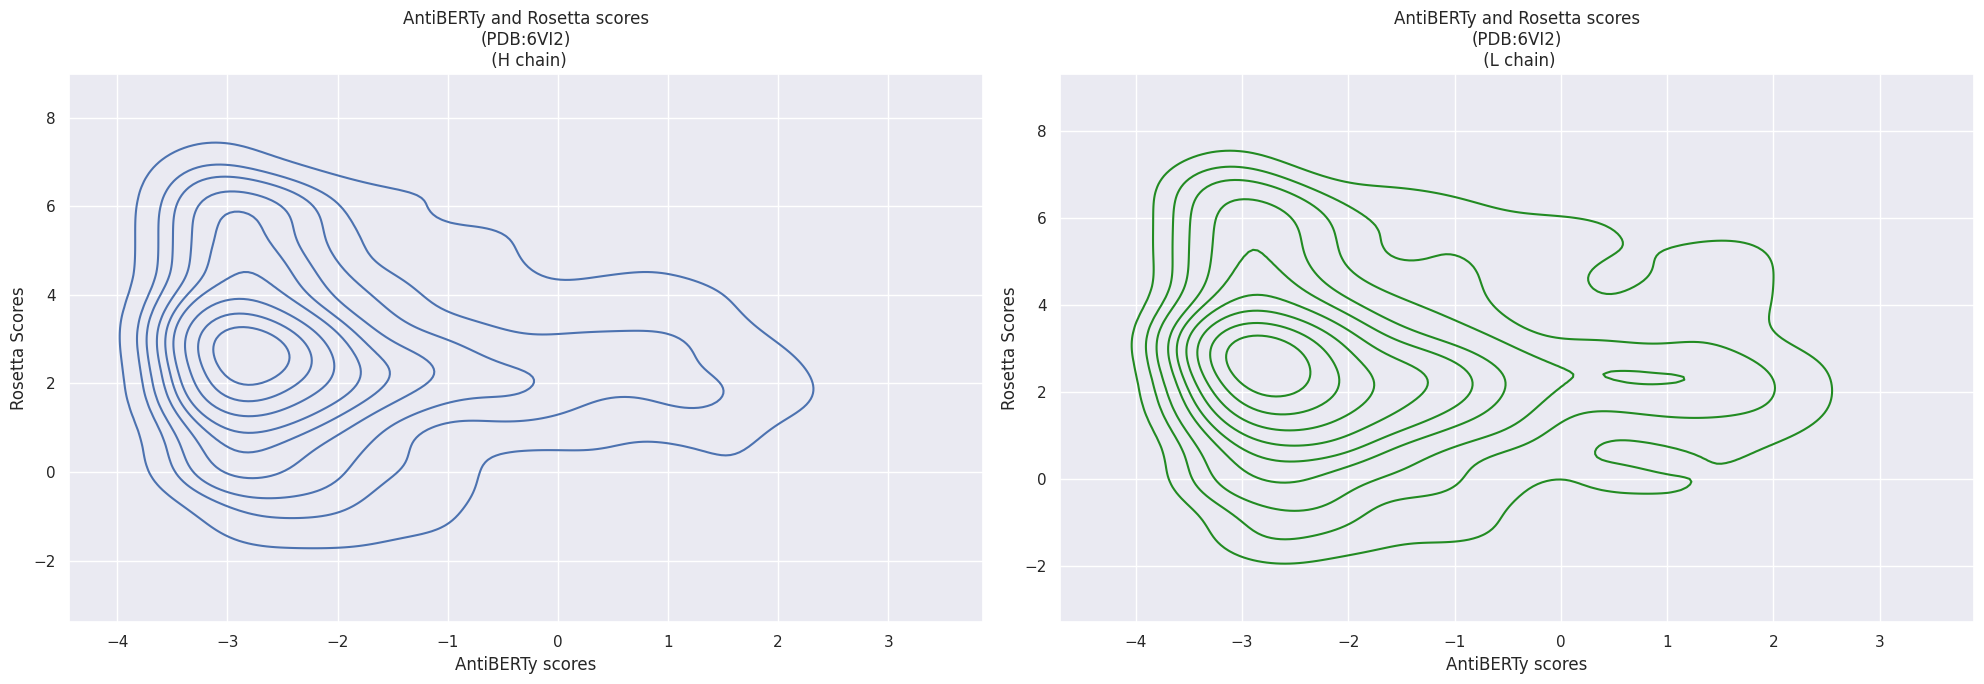

In [5]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_pictures_and_pdb_files"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_pictures_and_pdb_files"
output_folder_1ce1 = "Final work/Validation against clinically approved drugs/1ce1/1ce1_pictures_and_pdb_files"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_pictures_and_pdb_files"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_pictures_and_pdb_files"
output_folder_6vi2_BA = "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_pictures_and_pdb_files"

def distribution_scatterplot(df, title, save_path):
    plt.clf()
    L_chain = df[df["chain"] == "L"]
    H_chain = df[df["chain"] == "H"]
    
    pearson_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    spearman_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method = "spearman")
    variance = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
    
    # KDE plot
    sns.set_theme()
    sns.kdeplot(data=H_chain, x="AntiBERTy normalised", y="Rosetta normalised",  ax=axes[0])
    axes[0].set_xlabel("AntiBERTy scores")
    axes[0].set_ylabel("Rosetta Scores")
    axes[0].set_title(f"{title}\n (H chain)")
    
    # KDE plot for L_chain
    sns.kdeplot(data=L_chain, x="AntiBERTy normalised", y="Rosetta normalised",  ax=axes[1], color="forestgreen")
    axes[1].set_xlabel("AntiBERTy scores")
    axes[1].set_ylabel("Rosetta Scores")
    axes[1].set_title(f"{title}\n (L chain)")

    plt.tight_layout()
    plt.savefig(f"{save_path}", bbox_inches="tight")


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
distribution_scatterplot(a3eoa_file, f"AntiBERTy and Rosetta scores\n"
                         f"(Efalizumab - PDB:3EOA)", f"{output_folder_3eoa}/Score_distribution_by_chain_kde-plot.png")

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
distribution_scatterplot(a1bey_file, f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1BEY)", f"{output_folder_1bey}/Score_distribution_by_chain_kde-plot.png")

a1ce1_file = pd.read_csv("Clean files/1ce1_HL.csv")
distribution_scatterplot(a1ce1_file, f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1CE1)", f"{output_folder_1ce1}/Score_distribution_by_chain_kde-plot.png")

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
distribution_scatterplot(a1n8z_file, f"AntiBERTy and Rosetta scores\n"
                         f"(Trastuzumab - PDB:1N8Z)", f"{output_folder_1n8z}/Score_distribution_by_chain_kde-plot.png")

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
distribution_scatterplot(a1l7i_file, f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:1L7I)", f"{output_folder_1l7i}/Score_distribution_by_chain_kde-plot.png")

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
distribution_scatterplot(a6vi2_BA_file, f"AntiBERTy and Rosetta scores\n"
                         f"(PDB:6VI2)", f"{output_folder_6vi2_BA}/Score_distribution_by_chain_kde-plot.png")

<Figure size 640x480 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

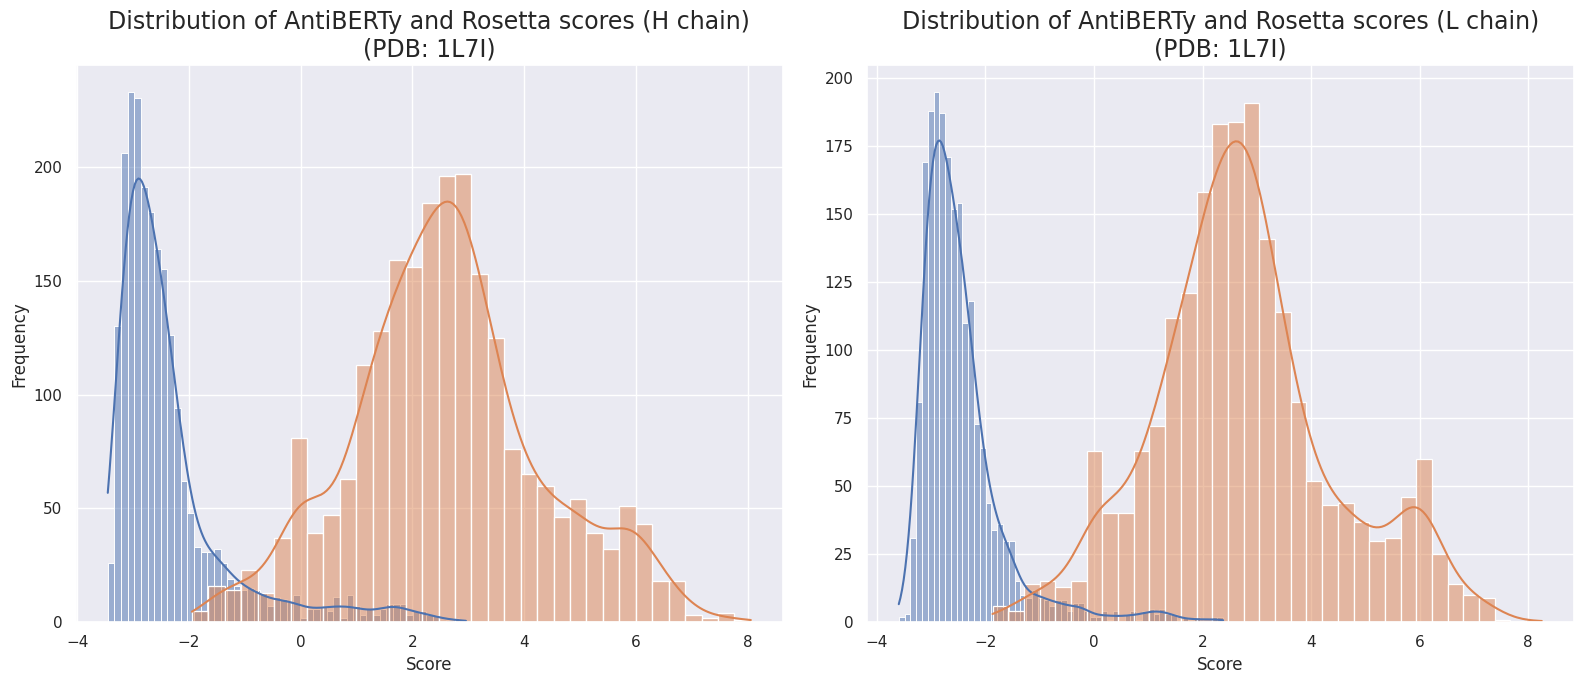

In [6]:
output_folder_base = "Final work/Validation against clinically approved drugs"
input_files = {
    "3eoa": "3eoa_BA.csv",
    "1bey": "1bey_HL.csv",
    "1ce1": "1ce1_HL.csv",
    "1n8z": "1n8z_BA.csv",
    "1l7i": "1l7i_HL.csv"
}

def distribution_scatterplot(df, title, save_path):
    plt.clf()
    L_chain = df[df["chain"] == "L"]
    H_chain = df[df["chain"] == "H"]
    
    pearson_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    spearman_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method = "spearman")
    variance = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
    
    # KDE plot
    sns.set_theme()
    sns.histplot(H_chain["AntiBERTy normalised"], kde=True, label="AntiBERTy", ax=axes[0])
    sns.histplot(H_chain["Rosetta normalised"], kde=True, label="Rosetta", ax=axes[0])
    axes[0].set_xlabel('Score')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f"Distribution of AntiBERTy and Rosetta scores (H chain)\n"
    f"({title})",  fontsize=17)
    
    # KDE plot for L_chain
    sns.histplot(L_chain["AntiBERTy normalised"], kde=True, label="AntiBERTy", ax=axes[1])
    sns.histplot(L_chain["Rosetta normalised"], kde=True, label="Rosetta", ax=axes[1])
    axes[1].set_xlabel('Score')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f"Distribution of AntiBERTy and Rosetta scores (L chain)\n"
    f"({title})", fontsize=17)

    plt.tight_layout()
    plt.savefig(f"{save_path}", bbox_inches="tight")


for pdb_code, file_name in input_files.items():
    output_folder = os.path.join(output_folder_base, pdb_code, f"{pdb_code}_pictures_and_pdb_files")
    file_path = os.path.join("Clean files", file_name)
    df = pd.read_csv(file_path)
    distribution_scatterplot(df, f"PDB: {pdb_code.upper()}", os.path.join(output_folder, "Score_distribution_by_chain_barplot.png"))

In [7]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/chains"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/chains"
output_folder_1ce1 = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/chains"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/chains"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/chains"

def process_correlations(df, output_folder):
    correlations_IMGT_chainH = {}
    correlations_IMGT_chainL = {}

    for position, group in df.groupby("IMGT numbering"):
        correlations_IMGT_chainH[position] = group[group["chain"] == "H"].copy()
        correlations_IMGT_chainL[position] = group[group["chain"] == "L"].copy()
    
    for chain_type, chain_dict in [("H", correlations_IMGT_chainH), ("L", correlations_IMGT_chainL)]:
        correlation_data = []
        
        for group, df_chain in chain_dict.items():
            df_chain["pearson_correlation"] = df_chain["AntiBERTy normalised"].corr(df_chain["Rosetta normalised"])
            df_chain["spearman_correlation"] = df_chain["AntiBERTy normalised"].corr(df_chain["Rosetta normalised"], method="spearman")
            df_chain["variance"] = np.var(df_chain["AntiBERTy normalised"] - df_chain["Rosetta normalised"])
            df_chain["std_dev"] = np.sqrt(df_chain["variance"])

            if not df_chain.empty:
                correlation_data.append({
                    "Position": df_chain["position"].iloc[0],
                    "IMGT numbering": df_chain["IMGT numbering"].iloc[0],
                    "Region": df_chain["region"].iloc[0],
                    "Amino acid": df_chain["WT_AA"].iloc[0],
                    "Pearson correlation": df_chain["pearson_correlation"].iloc[0],
                    "Spearman correlation": df_chain["spearman_correlation"].iloc[0]
                })
                
        if correlation_data:
            correlation_df = pd.DataFrame(correlation_data)
            correlation_df = correlation_df.sort_values(by="Position")
            correlation_df.to_csv(os.path.join(output_folder, f"chain_{chain_type}_correlations.csv"), index=False)


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
process_correlations(a3eoa_file, output_folder_3eoa)

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
process_correlations(a1bey_file, output_folder_1bey)

a1ce1_file = pd.read_csv("Clean files/1ce1_HL.csv")
process_correlations(a1ce1_file, output_folder_1ce1)

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
process_correlations(a1n8z_file, output_folder_1n8z)

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
process_correlations(a1l7i_file, output_folder_1l7i)

/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlatio

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

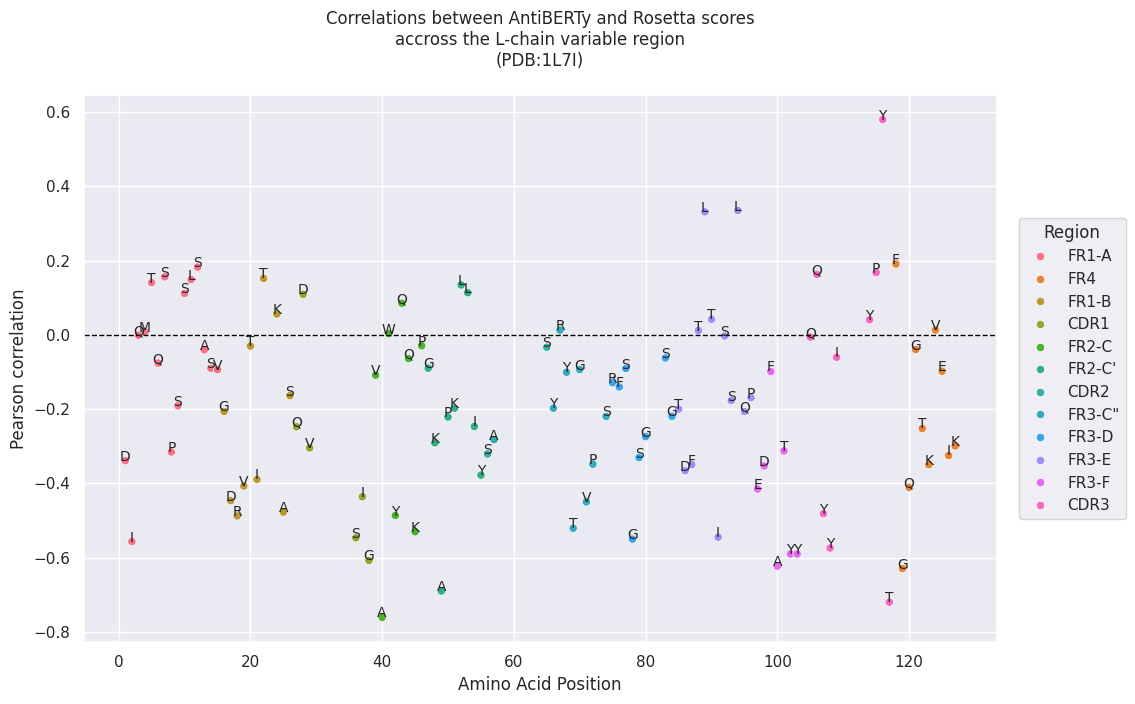

In [8]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_pictures_and_pdb_files"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_pictures_and_pdb_files"
output_folder_1ce1 = "Final work/Validation against clinically approved drugs/1ce1/1ce1_pictures_and_pdb_files"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_pictures_and_pdb_files"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_pictures_and_pdb_files"

input_folder_3eoa_h = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/chains/chain_H_correlations.csv"
input_folder_3eoa_l = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/chains/chain_L_correlations.csv"
input_folder_1bey_h = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/chains/chain_H_correlations.csv"
input_folder_1bey_l = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/chains/chain_L_correlations.csv"
input_folder_1ce1_h = "Final work/Validation against clinically approved drugs/1ce1/1ce1_correlations-DF/chains/chain_H_correlations.csv"
input_folder_1ce1_l = "Final work/Validation against clinically approved drugs/1ce1/1ce1_correlations-DF/chains/chain_L_correlations.csv"
input_folder_1n8z_h = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/chains/chain_H_correlations.csv"
input_folder_1n8z_l = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/chains/chain_L_correlations.csv"
input_folder_1l7i_h = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/chains/chain_H_correlations.csv"
input_folder_1l7i_l = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/chains/chain_L_correlations.csv"

def plot_figures(df, chain_type, title, output_folder):
    plt.clf()
    sns.set_theme()
    plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the {chain_type}-chain variable region\n"
                    f"({title})\n")
    sns.scatterplot(data = df, x = "IMGT numbering", y = "Pearson correlation", hue = "Region")
    for i, row in df.iterrows():
        plt.text(row["IMGT numbering"], row["Pearson correlation"], row["Amino acid"], fontsize=10, ha="center")
    plt.xlabel("Amino Acid Position")
    plt.ylabel("Pearson correlation")
    plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
    plt.legend(bbox_to_anchor=(1.15, 0.5), loc = "right", title = "Region")
    
    plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
    plt.savefig(f"{output_folder}/{chain_type}V_correlations_across_chain.png", bbox_inches="tight")


a3eoa_h_file = pd.read_csv(input_folder_3eoa_h)
a3eoa_l_file = pd.read_csv(input_folder_3eoa_l)
a1bey_h_file = pd.read_csv(input_folder_1bey_h)
a1bey_l_file = pd.read_csv(input_folder_1bey_l)
a1bey_h_file = pd.read_csv(input_folder_1bey_h)
a1bey_l_file = pd.read_csv(input_folder_1bey_l)
a1n8z_h_file = pd.read_csv(input_folder_1n8z_h)
a1n8z_l_file = pd.read_csv(input_folder_1n8z_l)
a1l7i_h_file = pd.read_csv(input_folder_1l7i_h)
a1l7i_l_file = pd.read_csv(input_folder_1l7i_l)

# Call plot_figures function with DataFrame objects
plot_figures(a3eoa_h_file, "H", "Efalizumab - PDB:3EOA", output_folder_3eoa)
plot_figures(a3eoa_l_file, "L", "Efalizumab - PDB:3EOA", output_folder_3eoa)
plot_figures(a1bey_h_file, "H", "PDB:1BEY", output_folder_1bey)
plot_figures(a1bey_l_file, "L", "PDB:1BEY", output_folder_1bey)
plot_figures(a1bey_h_file, "H", "PDB:1CE1", output_folder_1ce1)
plot_figures(a1bey_l_file, "L", "PDB:1BEY", output_folder_1ce1)
plot_figures(a1n8z_h_file, "H", "Trastuzumab - PDB:1N8Z", output_folder_1n8z)
plot_figures(a1n8z_l_file, "L", "Trastuzumab - PDB:1N8Z", output_folder_1n8z)
plot_figures(a1l7i_h_file, "H", "PDB:1L7I", output_folder_1l7i)
plot_figures(a1l7i_l_file, "L", "PDB:1L7I", output_folder_1l7i)

<Figure size 640x480 with 0 Axes>

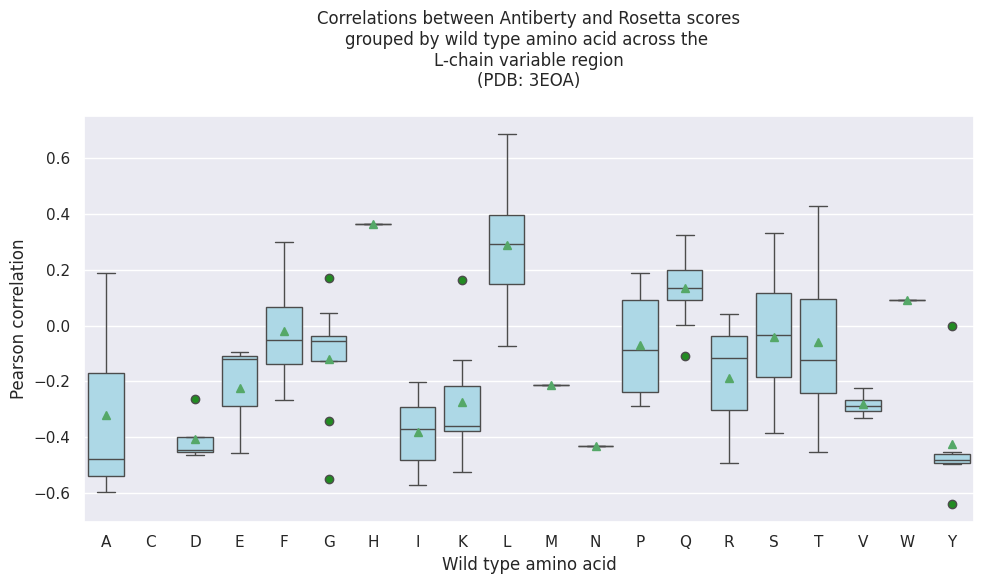

<Figure size 640x480 with 0 Axes>

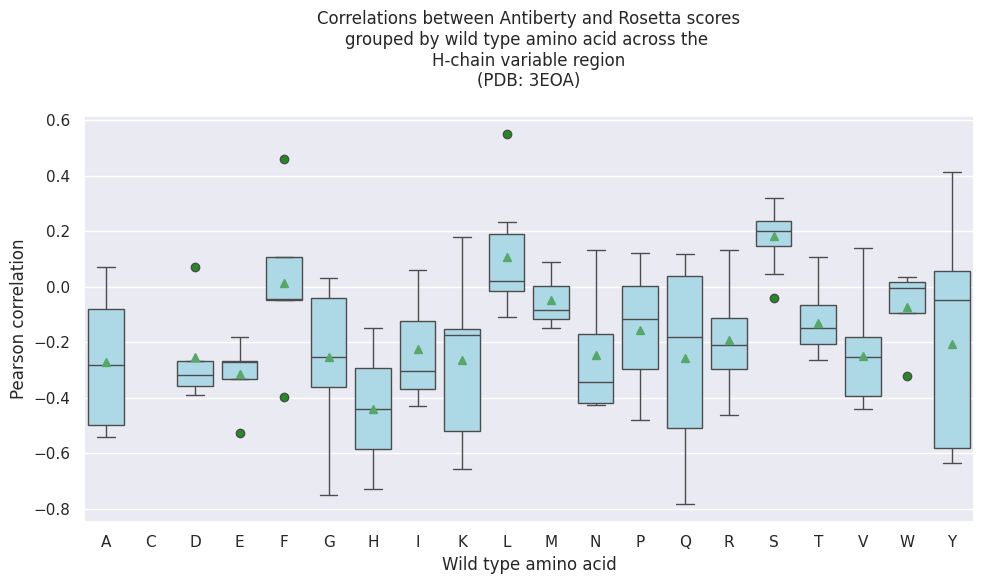

<Figure size 640x480 with 0 Axes>

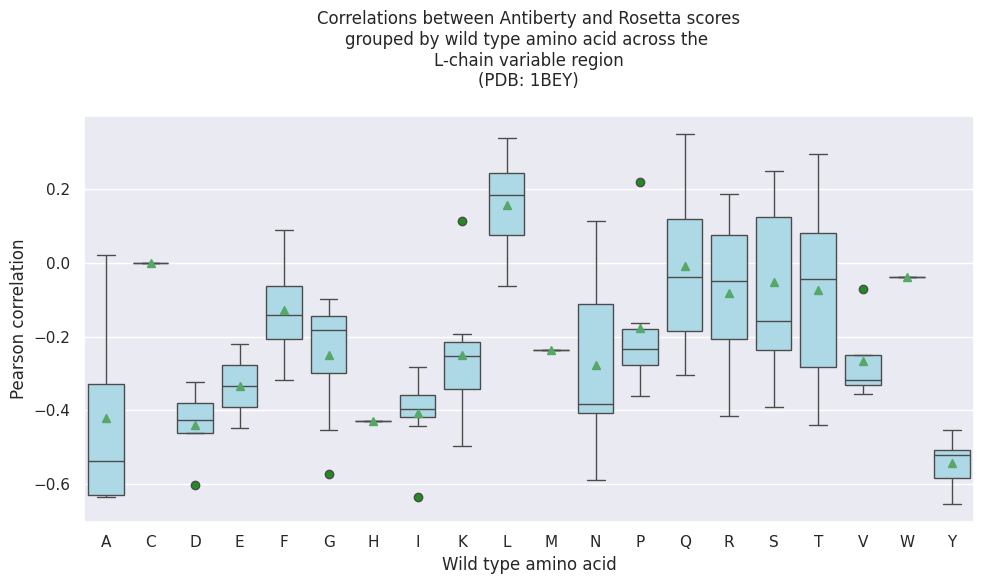

<Figure size 640x480 with 0 Axes>

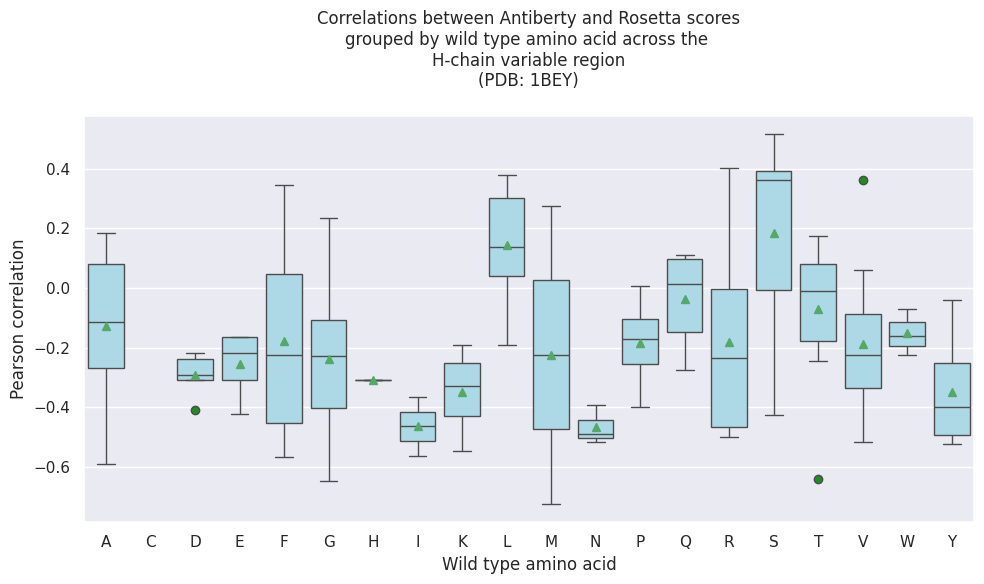

<Figure size 640x480 with 0 Axes>

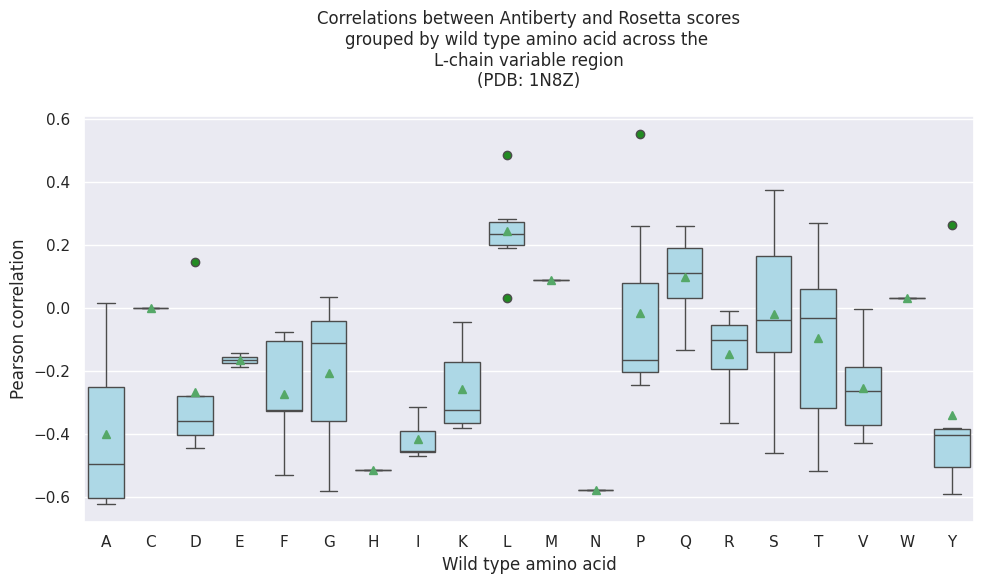

<Figure size 640x480 with 0 Axes>

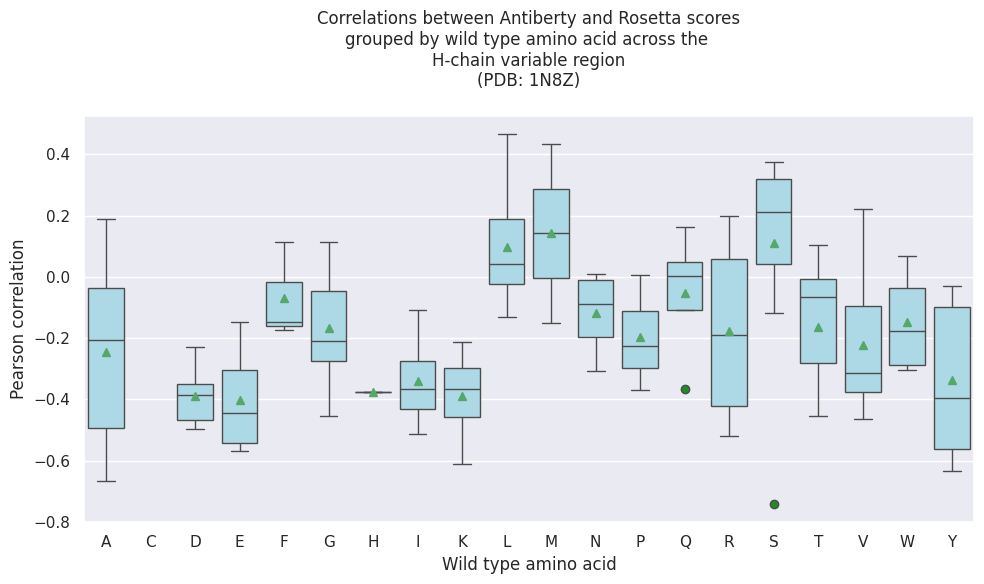

<Figure size 640x480 with 0 Axes>

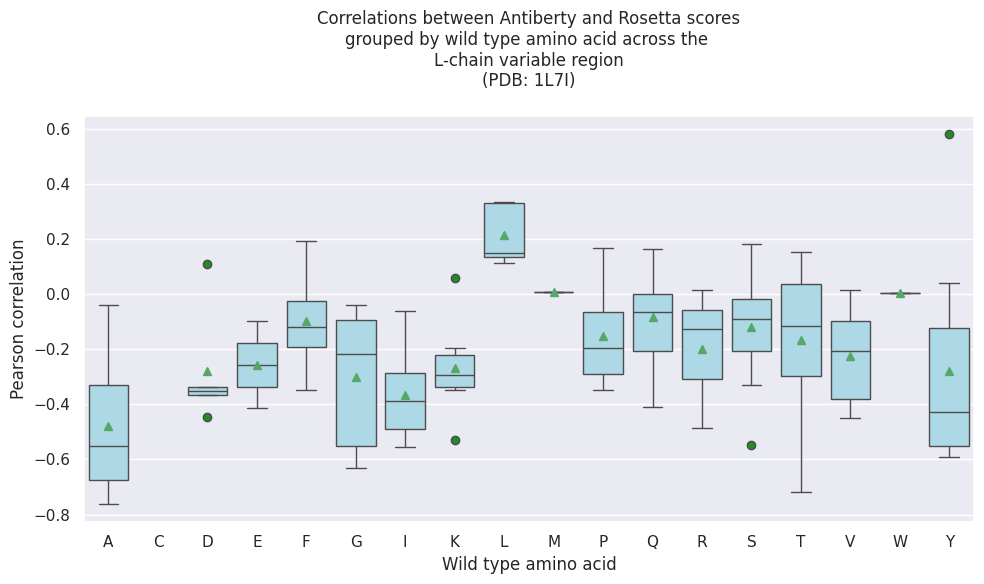

<Figure size 640x480 with 0 Axes>

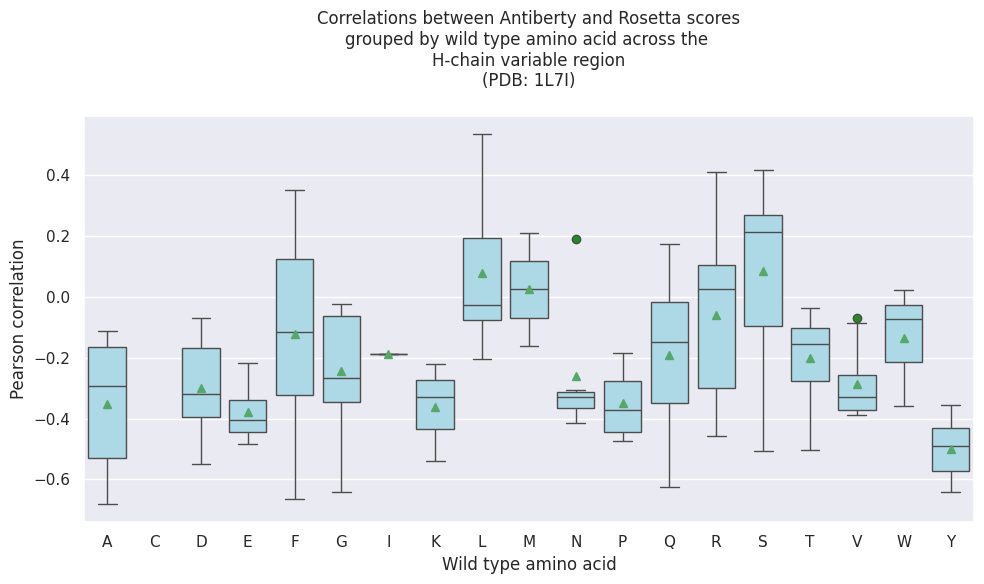

In [9]:
output_root = "Final work/Validation against clinically approved drugs"

pdb_folders = [
    ("3eoa", "Efalizumab - PDB:3EOA"),
    ("1bey", "PDB:1BEY"),
    ("1n8z", "Trastuzumab - PDB:1N8Z"),
    ("1l7i", "PDB:1L7I")
]

def get_input_folders(pdb_code):
    return [
        (f"{output_root}/{pdb_code}/{pdb_code}_correlations-DF/chains/chain_L_correlations.csv", "L"),
        (f"{output_root}/{pdb_code}/{pdb_code}_correlations-DF/chains/chain_H_correlations.csv", "H")
    ]
def get_correlations_for_each_position(df, chain_type):
    correlation_list = []
    
    for amino_acid, row in df.iterrows():
        correlation_list.append({
            "Amino acid": row["Amino acid"],
            "Position": row["IMGT numbering"],
            "Pearson correlation": row["Pearson correlation"],
            "Spearman correlations": row["Spearman correlation"]
        })
    return pd.DataFrame(correlation_list)    
 
def get_sample_data(df, pdb_code, chain_type):
    plt.clf()
    sns.set_theme()
    plt.figure(figsize=(10,6))
    sns.boxplot(
        x = "Amino acid",
        y = "Pearson correlation",
        showmeans = True, patch_artist=True, boxprops= dict(facecolor = "lightblue"), flierprops= dict(markerfacecolor="forestgreen"),
        data = df.sort_values(by=["Amino acid"], ascending=True)
    )
    
    plt.xlabel("Wild type amino acid")
    plt.ylabel("Pearson correlation")
    plt.title(f"Correlations between Antiberty and Rosetta scores\n"
              f"grouped by wild type amino acid across the \n"
    f"{chain_type}-chain variable region\n"
    f"(PDB: {pdb_code.upper()})\n")
    # plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.savefig(f"{output_root}/{pdb_code}/{pdb_code}_pictures_and_pdb_files/{chain_type}V_correlations_grouped_by_WT_AA_boxplot.png", bbox_inches = "tight")
    plt.show()

for pdb_code, pdb_title in pdb_folders:
    input_folders = get_input_folders(pdb_code)
    for input_folder, chain_type in input_folders:
        df = pd.read_csv(input_folder)
        sample_data = get_correlations_for_each_position(df, chain_type)
        get_sample_data(sample_data, pdb_code, chain_type)

# WT amino acid grouping
group amino acids in the sequence to see if they agree on based on amino acid type or if the location of the amino acid matters more

In [10]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/amino_acid_type(wt_aa)"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/amino_acid_type(wt_aa)"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/amino_acid_type(wt_aa)"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/amino_acid_type(wt_aa)"



def process_dataframes_by_wt_aa(df, output_folder):
    correlations_WT_AA_chainH = {}
    correlations_WT_AA_chainL = {}
   
    
    for WT_AA, group in df.groupby("WT_AA"):
        correlations_WT_AA_chainH[WT_AA] = group[group["chain"] == "H"].copy()
        correlations_WT_AA_chainL[WT_AA] = group[group["chain"] == "L"].copy()
    
    for chain_type, df_chain in [("H", correlations_WT_AA_chainH), ("L", correlations_WT_AA_chainL)]:
        WT_AA_list = []  # Initialize list for each chain type
        
        for WT_AA, df_aa in df_chain.items():
            if not df_aa.empty:
                df_aa["pearson_correlation"] = df_aa["AntiBERTy normalised"].corr(df_aa["Rosetta normalised"])
                df_aa["spearman_correlation"] = df_aa["AntiBERTy normalised"].corr(df_aa["Rosetta normalised"], method="spearman")
                df_aa["variance"] = np.var(df_aa["AntiBERTy normalised"] - df_aa["Rosetta normalised"])
                df_aa["std_dev"] = np.sqrt(df_aa["variance"])
                
                WT_AA_list.append({
                    "Amino acid": WT_AA,
                    "Pearson correlation": df_aa["pearson_correlation"].iloc[0],
                    "Spearman correlation": df_aa["spearman_correlation"].iloc[0]
                })
        
        # Save results separately for each chain type
        WT_AA_df = pd.DataFrame(WT_AA_list)
        WT_AA_df.to_csv(os.path.join(output_folder, f"chain_{chain_type}_correlations_by_WT_AA.csv"), index=False)


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
process_dataframes_by_wt_aa(a3eoa_file, output_folder_3eoa)

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
process_dataframes_by_wt_aa(a1bey_file, output_folder_1bey)

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
process_dataframes_by_wt_aa(a1n8z_file, output_folder_1n8z)

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
process_dataframes_by_wt_aa(a1l7i_file, output_folder_1l7i)

/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlatio

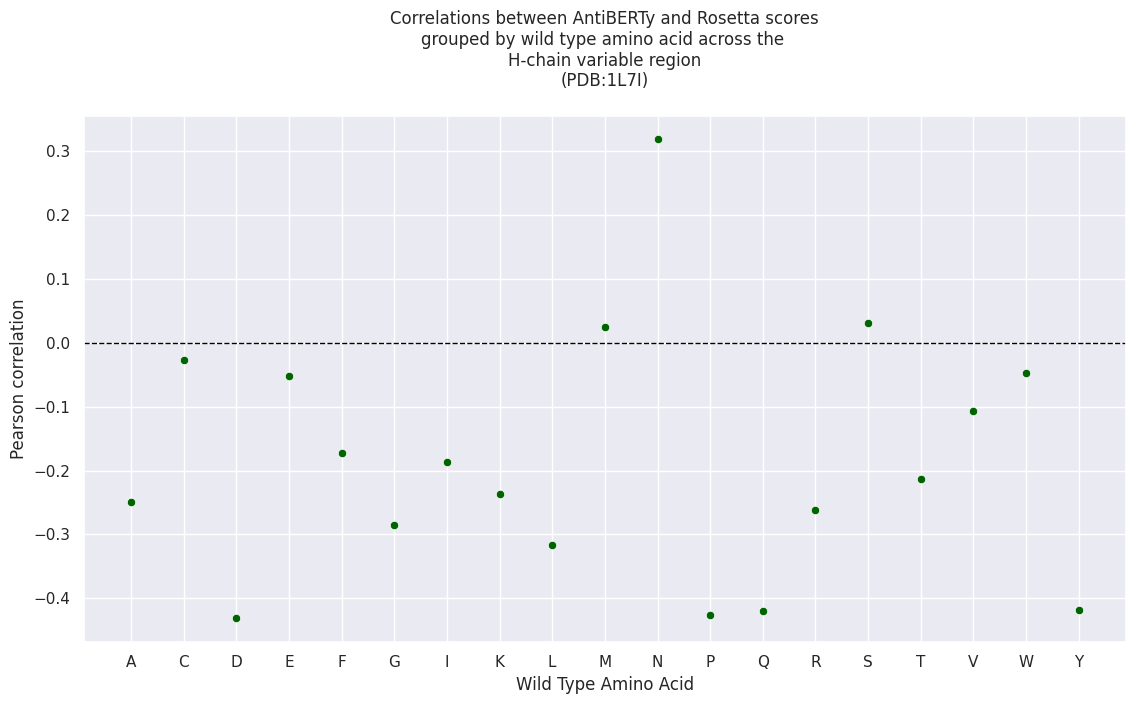

In [11]:
output_root = "Final work/Validation against clinically approved drugs"

pdb_folders = [
    ("3eoa", "Efalizumab - PDB:3EOA"),
    ("1bey", "PDB:1BEY"),
    ("1n8z", "Trastuzumab - PDB:1N8Z"),
    ("1l7i", "PDB:1L7I")
]

def get_input_folders(pdb_code):
    return [ 
        (f"{pdb_code}_correlations-DF/amino_acid_type(wt_aa)/chain_L_correlations_by_WT_AA.csv", "L"),
        (f"{pdb_code}_correlations-DF/amino_acid_type(wt_aa)/chain_H_correlations_by_WT_AA.csv", "H")
    ]

def plot_figures(df, chain_type, title, output_folder):
    plt.clf()
    sns.set_theme()
    plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
              f"grouped by wild type amino acid across the \n"
              f"{chain_type}-chain variable region\n"
              f"({title})\n")
    
    sns.scatterplot(data = df,  x="Amino acid", y="Pearson correlation", color="darkgreen")
    plt.xlabel("Wild Type Amino Acid")
    plt.ylabel("Pearson correlation")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
    plt.savefig(f"{output_folder}/{chain_type}V_WT_AA_correlations_split_by_region.png", bbox_inches="tight")

for pdb_folder, pdb_title in pdb_folders:
    output_folder = os.path.join(output_root, pdb_folder, f"{pdb_folder}_pictures_and_pdb_files")

    for input_file, chain_type in get_input_folders(pdb_folder):
        input_folder = os.path.join(output_root, pdb_folder, input_file)
        df = pd.read_csv(input_folder)
        plot_figures(df, chain_type, pdb_title, output_folder)

In [15]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/all_amino_acids"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/all_amino_acids"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/all_amino_acids"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/all_amino_acids"
output_folder_6vi2_BA = "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_correlations-DF/all_amino_acids"



def process_dataframes_by_wt_aa(df, pdb_code, output_folder):
    positive_values_list = []
    antiberty_pos_rosetta_neg_list = []
    rosetta_pos_antiberty_neg_list = []
    negative_values_list = []
    # df_sorted = df.sort_values(by=["chain","IMGT numbering"])


    for index, row in df.iterrows():
        AntiBERTy_normalised = row["AntiBERTy normalised"]
        Rosetta_normalised = row["Rosetta normalised"]
    
        positive_condition = AntiBERTy_normalised > 0 and Rosetta_normalised > 0 
        antiberty_pos_rosetta_neg_condition = AntiBERTy_normalised > 0 and Rosetta_normalised < 0 
        rosetta_pos_antiberty_neg_condition = AntiBERTy_normalised < 0 and Rosetta_normalised > 0
        negative_condition = AntiBERTy_normalised < 0 and Rosetta_normalised < 0

        if positive_condition:
            positive_values_list.append({
                "Chain": row["chain"],
                "Region": row["region"],
                "Position": row["position"],
                "IMGT": row["IMGT numbering"],
                "WT_AA": row["WT_AA"],
                "MUT_AA": row["MUT_AA"],
                "AntiBERTy_normalised": AntiBERTy_normalised,
                "Rosetta_normalised": Rosetta_normalised
            })
            
        elif antiberty_pos_rosetta_neg_condition:
            antiberty_pos_rosetta_neg_list.append({
                "Chain": row["chain"],
                "Region": row["region"],
                "Position": row["position"],
                "IMGT": row["IMGT numbering"],
                "WT_AA": row["WT_AA"],
                "MUT_AA": row["MUT_AA"],
                "AntiBERTy_normalised": AntiBERTy_normalised,
                "Rosetta_normalised": Rosetta_normalised
            })
    
        elif rosetta_pos_antiberty_neg_condition:
            rosetta_pos_antiberty_neg_list.append({
                "Chain": row["chain"],
                "Region": row["region"],
                "Position": row["position"],
                "IMGT": row["IMGT numbering"],
                "WT_AA": row["WT_AA"],
                "MUT_AA": row["MUT_AA"],
                "AntiBERTy_normalised": AntiBERTy_normalised,
                "Rosetta_normalised": Rosetta_normalised
            })
    
        elif negative_condition:
            negative_values_list.append({
                "Chain": row["chain"],
                "Region": row["region"],
                "Position": row["position"],
                "IMGT": row["IMGT numbering"],
                "WT_AA": row["WT_AA"],
                "MUT_AA": row["MUT_AA"],
                "AntiBERTy_normalised": AntiBERTy_normalised,
                "Rosetta_normalised": Rosetta_normalised
            })
        

        positive_df = pd.DataFrame(positive_values_list)
        negative_df = pd.DataFrame(negative_values_list)
        antiberty_pos_rosetta_neg_df = pd.DataFrame(antiberty_pos_rosetta_neg_list)
        rosetta_pos_antiberty_neg_df = pd.DataFrame(rosetta_pos_antiberty_neg_list)
        
        positive_df.to_csv(os.path.join(output_folder, f"{pdb_code}_positive_scores.csv"), index=False)
        negative_df.to_csv(os.path.join(output_folder, f"{pdb_code}_negative_scores.csv"), index=False)
        antiberty_pos_rosetta_neg_df.to_csv(os.path.join(output_folder, f"{pdb_code}_antiberty_pos_rosetta_neg_scores.csv"), index=False)
        rosetta_pos_antiberty_neg_df.to_csv(os.path.join(output_folder, f"{pdb_code}_antiberty_neg_rosetta_pos_scores.csv"), index=False)


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
process_dataframes_by_wt_aa(a3eoa_file, "3eoa", output_folder_3eoa)

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
process_dataframes_by_wt_aa(a1bey_file, "1bey", output_folder_1bey)

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
process_dataframes_by_wt_aa(a1n8z_file, "1n8z", output_folder_1n8z)

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
process_dataframes_by_wt_aa(a1l7i_file, "1l7i" ,output_folder_1l7i)

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
process_dataframes_by_wt_aa(a6vi2_BA_file, "6vi2_BA", output_folder_6vi2_BA)

In [ ]:
"""
the above code can be optimised
"""
output_folders = {
    "3eoa": "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/all_amino_acids",
    "1bey": "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/all_amino_acids",
    "1n8z": "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/all_amino_acids",
    "1l7i": "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/all_amino_acids",
    "6vi2_BA": "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_correlations-DF/all_amino_acids"
}

def process_dataframes_by_wt_aa(df, pdb_code, output_folder):
    positive_df = df[(df["AntiBERTy normalised"] > 0) & (df["Rosetta normalised"] > 0)]
    negative_df = df[(df["AntiBERTy normalised"] < 0) & (df["Rosetta normalised"] < 0)]
    antiberty_pos_rosetta_neg_df = df[(df["AntiBERTy normalised"] > 0) & (df["Rosetta normalised"] < 0)]
    rosetta_pos_antiberty_neg_df = df[(df["AntiBERTy normalised"] < 0) & (df["Rosetta normalised"] > 0)]
    
    positive_df.to_csv(os.path.join(output_folder, f"{pdb_code}_positive_scores.csv"), index=False)
    negative_df.to_csv(os.path.join(output_folder, f"{pdb_code}_negative_scores.csv"), index=False)
    antiberty_pos_rosetta_neg_df.to_csv(os.path.join(output_folder, f"{pdb_code}_antiberty_pos_rosetta_neg_scores.csv"), index=False)
    rosetta_pos_antiberty_neg_df.to_csv(os.path.join(output_folder, f"{pdb_code}_antiberty_neg_rosetta_pos_scores.csv"), index=False)

a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
process_dataframes_by_wt_aa(a3eoa_file, "3eoa", output_folders["3eoa"])

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
process_dataframes_by_wt_aa(a1bey_file, "1bey", output_folders["1bey"])

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
process_dataframes_by_wt_aa(a1n8z_file, "1n8z", output_folders["1n8z"])

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
process_dataframes_by_wt_aa(a1l7i_file, "1l7i", output_folders["1l7i"])

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
process_dataframes_by_wt_aa(a6vi2_BA_file, "6vi2_BA", output_folders["6vi2_BA"])

# MUT_AA amino acid preference

In [13]:
output_folder_3eoa = "Final work/Validation against clinically approved drugs/3eoa/3eoa_correlations-DF/amino_acid_type(mut_aa)"
output_folder_1bey = "Final work/Validation against clinically approved drugs/1bey/1bey_correlations-DF/amino_acid_type(mut_aa)"
output_folder_1n8z = "Final work/Validation against clinically approved drugs/1n8z/1n8z_correlations-DF/amino_acid_type(mut_aa)"
output_folder_1l7i = "Final work/Validation against clinically approved drugs/1l7i/1l7i_correlations-DF/amino_acid_type(mut_aa)"
output_folder_6vi2_BA = "Final work/Validation against clinically approved drugs/6vi2_BA/6vi2_BA_correlations-DF/amino_acid_type(mut_aa)"



def process_dataframes_by_mut_aa(df, output_folder):
    correlations_MUT_AA_chainH = {}
    correlations_MUT_AA_chainL = {}
   
    
    for WT_AA, group in df.groupby("WT_AA"):
        correlations_MUT_AA_chainH[WT_AA] = group[group["chain"] == "H"].copy()
        correlations_MUT_AA_chainL[WT_AA] = group[group["chain"] == "L"].copy()
    
    for chain_type, df_chain in [("H", correlations_MUT_AA_chainH), ("L", correlations_MUT_AA_chainL)]:
        MUT_AA_list = []  # Initialize list for each chain type
        
        for MUT_AA, df_aa in df_chain.items():
            if not df_aa.empty:
                df_aa["pearson_correlation"] = df_aa["AntiBERTy normalised"].corr(df_aa["Rosetta normalised"])
                df_aa["spearman_correlation"] = df_aa["AntiBERTy normalised"].corr(df_aa["Rosetta normalised"], method="spearman")
                df_aa["variance"] = np.var(df_aa["AntiBERTy normalised"] - df_aa["Rosetta normalised"])
                df_aa["std_dev"] = np.sqrt(df_aa["variance"])
                
                MUT_AA_list.append({
                    "Amino acid": MUT_AA,
                    "Pearson correlation": df_aa["pearson_correlation"].iloc[0],
                    "Spearman correlation": df_aa["spearman_correlation"].iloc[0]
                })
        
        # Save results separately for each chain type
        MUT_AA_df = pd.DataFrame(MUT_AA_list)
        MUT_AA_df.to_csv(os.path.join(output_folder, f"chain_{chain_type}_correlations_by_MUT_AA.csv"), index=False)


a3eoa_file = pd.read_csv("Clean files/3eoa_BA.csv")
process_dataframes_by_mut_aa(a3eoa_file, output_folder_3eoa)

a1bey_file = pd.read_csv("Clean files/1bey_HL.csv")
process_dataframes_by_mut_aa(a1bey_file, output_folder_1bey)

a1n8z_file = pd.read_csv("Clean files/1n8z_BA.csv")
process_dataframes_by_mut_aa(a1n8z_file, output_folder_1n8z)

a1l7i_file = pd.read_csv("Clean files/1l7i_HL.csv")
process_dataframes_by_mut_aa(a1l7i_file, output_folder_1l7i)

a6vi2_BA_file = pd.read_csv("Clean files/6vi2_BA.csv")
process_dataframes_by_mut_aa(a6vi2_BA_file, output_folder_6vi2_BA)

/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlatio

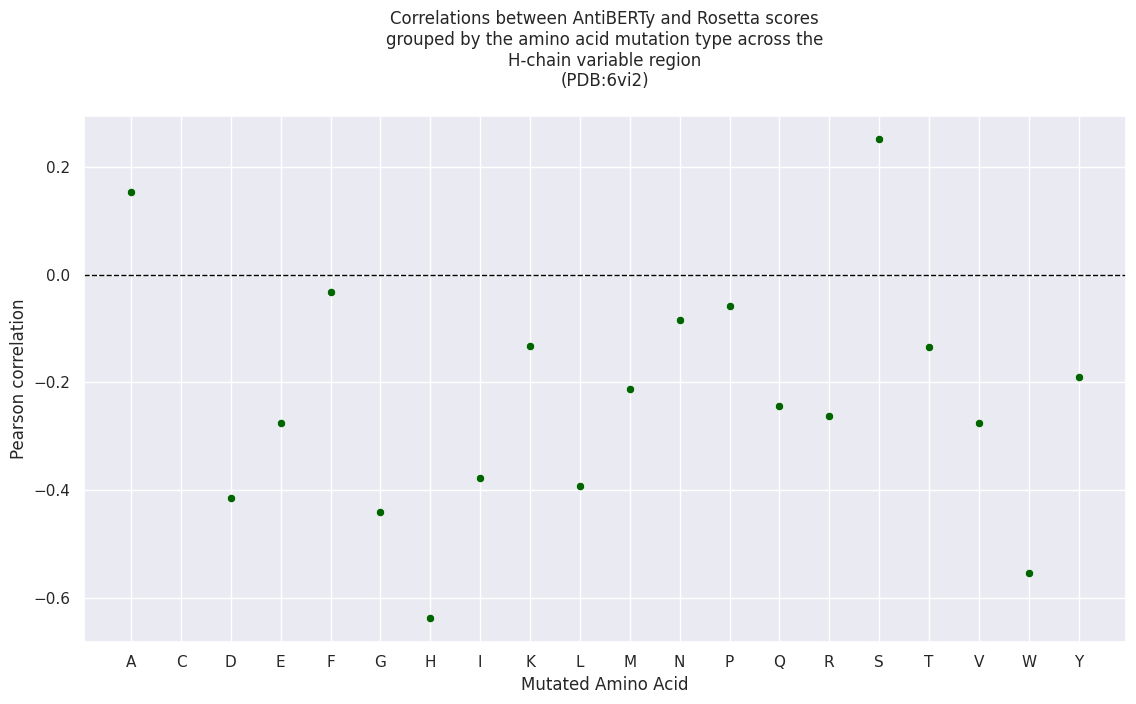

In [14]:
output_root = "Final work/Validation against clinically approved drugs"

pdb_folders = [
    ("3eoa", "Efalizumab - PDB:3EOA"),
    ("1bey", "PDB:1BEY"),
    ("1n8z", "Trastuzumab - PDB:1N8Z"),
    ("1l7i", "PDB:1L7I"),
    ("6vi2_BA", "PDB:6vi2")
]

def get_input_folders(pdb_code):
    return [ 
        (f"{pdb_code}_correlations-DF/amino_acid_type(mut_aa)/chain_L_correlations_by_MUT_AA.csv", "L"),
        (f"{pdb_code}_correlations-DF/amino_acid_type(mut_aa)/chain_H_correlations_by_MUT_AA.csv", "H")
    ]

def plot_figures(df, chain_type, title, output_folder):
    plt.clf()
    sns.set_theme()
    plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
              f"grouped by the amino acid mutation type across the\n"
              f"{chain_type}-chain variable region\n"
              f"({title})\n")
    
    sns.scatterplot(data = df,  x="Amino acid", y="Pearson correlation", color="darkgreen")
    plt.xlabel("Mutated Amino Acid")
    plt.ylabel("Pearson correlation")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
    plt.savefig(f"{output_folder}/{chain_type}V_MUT_AA_correlations_split_by_region.png", bbox_inches="tight")

for pdb_folder, pdb_title in pdb_folders:
    output_folder = os.path.join(output_root, pdb_folder, f"{pdb_folder}_pictures_and_pdb_files")

    for input_file, chain_type in get_input_folders(pdb_folder):
        input_folder = os.path.join(output_root, pdb_folder, input_file)
        df = pd.read_csv(input_folder)
        plot_figures(df, chain_type, pdb_title, output_folder)